<img src="https://drive.google.com/uc?export=view&amp;id=1zSJwAUxWv5bxyYLmYPNi-s6M_Wq5iWXh">

In [ ]:
pip install nltk

In [ ]:
import numpy as np
import pandas as pd
import os
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import random
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **Dataset:- Sherlock Stories**
Contains all Sherlock stories (short stories + Novels)

## **Reading all .txt files(stories)**

In [ ]:
import os

story_path = "/content/drive/My Drive/sherlock"

def read_all_stories(story_path):
    txt = []
    for root, _, files in os.walk(story_path):
        for file in files:
            # Check if the file has a ".txt" extension
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r') as f:
                    for line in f:
                        line = line.strip()
                        if line == '----------':
                            break
                        if line != '':
                            txt.append(line)
    return txt

stories = read_all_stories(story_path)

print("Number of lines =", len(stories))


Number of lines = 215021


In [ ]:
stories[:10]

['THE ADVENTURE OF THE THREE GARRIDEBS',
 'Arthur Conan Doyle',
 'It may have been a comedy, or it may have been a tragedy. It cost one',
 'man his reason, it cost me a blood-letting, and it cost yet another',
 'man the penalties of the law. Yet there was certainly an element of',
 'comedy. Well, you shall judge for yourselves.',
 'I remember the date very well, for it was in the same month that',
 'Holmes refused a knighthood for services which may perhaps some day',
 'be described. I only refer to the matter in passing, for in my',
 'position of partner and confidant I am obliged to be particularly']

## **Cleaning the text**

In [ ]:
def clean_txt(txt):
    cleaned_txt = []
    for line in txt:
        line = line.lower()
        line = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-\\]", "", line)
        tokens = word_tokenize(line)
        words = [word for word in tokens if word.isalpha()]
        cleaned_txt += (words)
    return cleaned_txt

cleaned_stories = clean_txt(stories)
print("number of words = ", len(cleaned_stories))

number of words =  2332247


In [ ]:
cleaned_stories[:10]

['the',
 'adventure',
 'of',
 'the',
 'three',
 'garridebs',
 'arthur',
 'conan',
 'doyle',
 'it']

## **Creating the Markov Model**

In [ ]:
def make_markov_model_1(cleaned_stories, n_gram=1):
    markov_model = {}
    for i in range(len(cleaned_stories)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += cleaned_stories[i+j-1] + " "
            next_state += cleaned_stories[i+j+n_gram-1] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1

    # calculating transition probabilities
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total

    return markov_model

In [ ]:
def make_markov_model_3(cleaned_stories, n_gram=3):
    markov_model = {}
    for i in range(len(cleaned_stories)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += cleaned_stories[i+j-1] + " "
            next_state += cleaned_stories[i+j+n_gram-1] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1

    # calculating transition probabilities
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total

    return markov_model

In [ ]:
def make_markov_model_2(cleaned_stories, n_gram=2):
    markov_model = {}
    for i in range(len(cleaned_stories)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += cleaned_stories[i+j] + " "
            next_state += cleaned_stories[i+j+n_gram] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1

    # calculating transition probabilities
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total

    return markov_model

In [ ]:
markov_model_3 = make_markov_model_3(cleaned_stories)
markov_model_2 = make_markov_model_2(cleaned_stories)
markov_model_1= make_markov_model_1(cleaned_stories)


In [ ]:
print("number of states = ", len(markov_model_3.keys()))

number of states =  474225


In [ ]:
print("All possible transitions from 'it is the' state: \n")
print(markov_model_3['it is the'])

All possible transitions from 'it is the' state: 

{'german who is': 0.013888888888888888, 'morning chronicle of': 0.013888888888888888, 'first saturday night': 0.013888888888888888, 'brightest rift which': 0.013888888888888888, 'more strange since': 0.013888888888888888, 'of the gun': 0.013888888888888888, 'object of these': 0.013888888888888888, 'vilest on the': 0.013888888888888888, 'clue which will': 0.013888888888888888, 'precious stone not': 0.013888888888888888, 'season of forgiveness': 0.013888888888888888, 'worst of all': 0.013888888888888888, 'purest accident i': 0.013888888888888888, 'most lovely country': 0.013888888888888888, 'most probable one': 0.013888888888888888, 'five miles of': 0.013888888888888888, 'daughter miss alice': 0.013888888888888888, 'less likely to': 0.013888888888888888, 'tobacco which i': 0.013888888888888888, 'supposed murder of': 0.013888888888888888, 'least i can': 0.010416666666666666, 'only time i': 0.010416666666666666, 'first rule of': 0.01388888

## **Model for Generating a Story**

In [ ]:
def generate_story(markov_model, start, limit=100):
    n = 0
    curr_state = start
    next_state = None
    story = ""
    story+=curr_state+" "
    while n<limit:
        next_state = random.choices(list(markov_model[curr_state].keys()),
                                    list(markov_model[curr_state].values()))

        curr_state = next_state[0]
        story+=curr_state+" "
        n+=1
    return story

### **Generating 10 lines of a story with a given seed text/initial text**

In [ ]:
for i in range(10):
    print(str(i)+". ", generate_story(markov_model_2, start="dear holmes", limit=8))

0.  dear holmes if i call i am afraid i cant forget that we know we have their description 
1.  dear holmes i thought of that secret treaty between england and italy of which we already knew holmes 
2.  dear holmes i have rather invited this persecution since i saw you near the window where boots had 
3.  dear holmes said i very likely yet the amazing thing is that asked holmes we have now been 
4.  dear holmes i fear him for he was here i shall be strong enough if i had left 
5.  dear holmes he has lost some years ago when he refers to her photograph it is our friend 
6.  dear holmes oh yes no doubt and used this means of giving the alarm why did you drive 
7.  dear holmes am i allowed to dry up and served the humble words very good brother morris its 
8.  dear holmes said i as i hurried on past me without a breach of it is not but 
9.  dear holmes he has many a curious glance was cast but it did seem strange of human experience 


In [ ]:
for i in range(10):
    print(str(i)+". ", generate_story(markov_model_3, start="my dear watson", limit=8))

0.  my dear watson i am perfectly fresh now and quite ready for another nights outing no we can do nothing we can only wait if we go 
1.  my dear watson do you imagine that it means i have no connection with any other people who have been making a fool of me and that 
2.  my dear watson should have told me all however we may congratulate ourselves upon a search that you knew to be justice there he found evil tidings 
3.  my dear watson and all your following were investigating in the most fantastic fashion by his hand upon my arm i think watson that if we drive 
4.  my dear watson was very faulty you should have no difficulty in engaging a bedroom and at the same time most conducive to a display of those 
5.  my dear watson we have ended by turning the dancing men to good when they have so often cautioned me not to do this myself for as 
6.  my dear watson i had the good fortune to seize upon that and everything which has occurred since then has served to confirm my original suppositio

In [ ]:
for i in range(10):
    print(str(i)+". ", generate_story(markov_model_2, start="my dear", limit=8))

0.  my dear watson try a little nut for you to know that i would say eminent bodymaster that 
1.  my dear sir i have not forgotten your successful action in the direction of chesterfield what do you 
2.  my dear madam said holmes cheerily as we moved across it in advance for this reason i sent 
3.  my dear friend stood i know the name douglas rich country now at birlstone manor house did not 
4.  my dear mycroft the chain is complete the maids corroboration was sufficient the detail was fairly within the 
5.  my dear sir cried the king of bohemia i was so out of breath mr gibson yes he 
6.  my dear watson said he you seem heeled and ready the young man into safe quarters so within 
7.  my dear daughter alice now in his fifth year and has brought nothing but i am on duty 
8.  my dear holmes i believe said she i asked she is franklands daughter what was to be his 
9.  my dear colonel that you must put it down to see me touch your money afterwards if you 


In [ ]:
print(generate_story(markov_model_3, start="the case of", limit=100))

the case of the thor bridge mystery to your annals i have been sluggish in mind and wanting in that mixture of imagination and reality which is the basis of the deduction the same may be said my dear fellow for the effect of some of these little sketches of yours which is entirely meretricious depending as it does upon your retaining in your own hands some factors in the problem which we have to deal and we must not permit our attention to wander away from it it is obvious that he would go for days and even for a week and then yesterday morning i found this paper lying on the in the garden i lent the ostlers a hand in the affairs of life it is something new for me to see how the detectives overbearing manner had changed suddenly to that of a sensitive gentleman and the thin white hand which he laid on the mantelpiece as he rose was that of an artist rather than of a surgeon his dress was quiet and sombre a black dark trousers and a touch of nerves that at least is very easily settled s

In [ ]:
print(generate_story(markov_model_1, start="sherlock", limit=100))

sherlock holmes is the maid who has never left the woman i had once more respectable establishment was evidently not well well you have consulted not see sir i found his suggestion of the sofa now practically complete set like the stair first that belongs to the news agent without my patients were not an accomplice together round my face and alec was right away from a local fanatic would be found ourselves to see how did but james left my chance of the and official police must make up a tall gaunt features became master had been inflicted was not 


## **Calculating BLEU score for single generated text**

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
result=generate_story(markov_model_2, start="sherlock holmes", limit=200)
#stories is our cleaned text variable
generated_tokens = result.split()
reference_tokens = [sentence.split() for sentence in stories]

# Compute the BLEU score
bleu_score = corpus_bleu([reference_tokens], [generated_tokens])

print("BLEU Score:", bleu_score)
print(result)

BLEU Score: 0.49321942710512484
sherlock holmes and myself i know hes following someone yesterday he was well liked by the way he dropped his papers and to find any other point which we shall drive round together after luncheon certainly i answered what you have got his there has been used if it had been snatched down from mrs hilton cubitt was seriously injured and is rather inaccessible to all appearance a most brilliant career before him but at last he started in the sunshine with a confused memory too of having taken opium never thank you mrs lyons we were under the impression of flabbiness which this man inspired me i could see that from me once or twice as in feature she impressed me with fear and he fell backwards cutting his face open that was possible for you to two curiosities five minutes we were there under the ten minutes then he could run until he was dancing and laughing and wringing my hand could this be my stern friend these were hidden fires indeed a beard a beard fol

## **Calculating BLEU score for Multiple generated texts**

In [ ]:
bleu_scores_model_1 = []
inputs_model_1 = ['sherlock','holmes','gun','the']  # List of inputs for model 1
for input_text in inputs_model_1:
    result = generate_story(markov_model_1, input_text, limit=200)
    generated_tokens = result.split()
    reference_tokens = [sentence.split() for sentence in stories]

    bleu_score = corpus_bleu([reference_tokens], [generated_tokens])
    bleu_scores_model_1.append(bleu_score)

In [ ]:
bleu_scores_model_2 = []
inputs_model_2 = ['my dear','was a','sherlock is','the case']  # List of inputs for model 2
for input_text in inputs_model_2:
    result = generate_story(markov_model_2, input_text, limit=200)
    generated_tokens = result.split()
    reference_tokens = [sentence.split() for sentence in stories]

    bleu_score = corpus_bleu([reference_tokens], [generated_tokens])
    bleu_scores_model_2.append(bleu_score)

In [ ]:
bleu_scores_model_3 = []
inputs_model_3 = ['it is the','first rule of','sherlock holmes is','the case of']  # List of inputs for model 3

for input_text in inputs_model_3:
    result = generate_story(markov_model_3, input_text, limit=200)
    generated_tokens = result.split()
    reference_tokens = [sentence.split() for sentence in stories]

    bleu_score = corpus_bleu([reference_tokens], [generated_tokens])
    bleu_scores_model_3.append(bleu_score)


In [ ]:
print(bleu_scores_model_1)
print(bleu_scores_model_2)
print(bleu_scores_model_3)

[0.2300133520773233, 0.20261164638795667, 0.23494509019939988, 0.1949746790688365]
[0.5180243107161651, 0.502341490869062, 0.505695453480847, 0.4674755092913363]
[0.5035106888410578, 0.5209253236227978, 0.5257508482167522, 0.51382268548481]


## **Results:-**

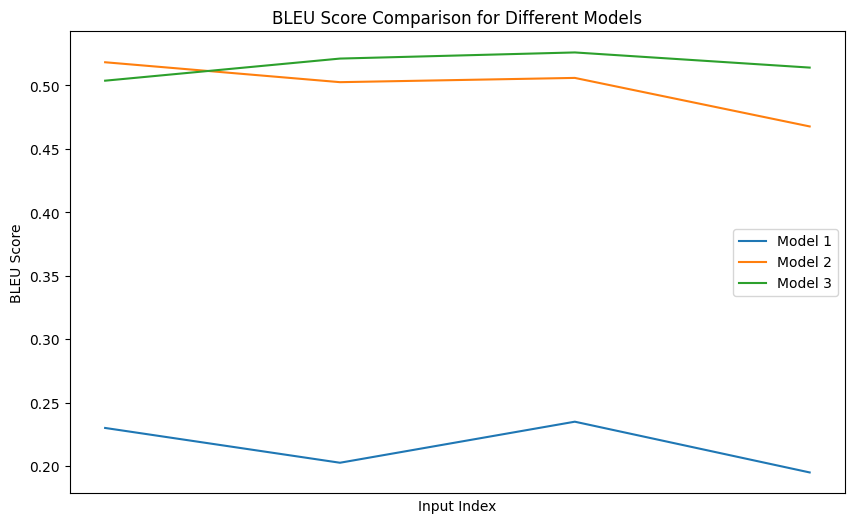

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(bleu_scores_model_1, label='Model 1')
plt.plot(bleu_scores_model_2, label='Model 2')
plt.plot(bleu_scores_model_3, label='Model 3')
plt.xlabel('Input Index')
plt.ylabel('BLEU Score')
plt.title('BLEU Score Comparison for Different Models')
plt.legend()
plt.xticks([])
plt.show()


## **Inference**
* BLEU scores for n_grams=3 range between approximately 0.50 to 0.53, indicating **moderate to reasonably good similarity** with the reference text. It implies that the machine-generated text has captured a substantial portion of the concepts, phrases, and wordings found in the human-written reference.

* Scores for n_grams=2 from approximately 0.467 to 0.518, suggest a **moderate to reasonably good level of similarity** between the machine-generated text and the reference text.


* Scores for a unigram ranging from approximately 0.19 to 0.23, suggest a **moderate level of similarity** between the machine-generated text and the reference text. There still is a massive room for improvement.